<a href="https://colab.research.google.com/github/sakskap/sakskap.github.io/blob/main/Cancer_Data_PCA%26SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
df_features = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
df_target = pd.DataFrame(cancer.target, columns=['target'])
df_target['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [ ]:
df = pd.concat([df_features, df_target], axis=1)

In [ ]:
df['target'] = df['target'].apply(lambda x: "Benign"
                                  if x == 1 else "Malignant")
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_features)

features_scaled = scaler.transform(df_features)
features_scaled = pd.DataFrame(data=features_scaled,
                               columns=df_features.columns)

df_scaled = pd.concat([features_scaled, df['target']], axis=1)

SVD

In [ ]:
from numpy.linalg import svd

In [ ]:
U, S, Vt = np.linalg.svd(features_scaled, full_matrices=False)

In [ ]:
print('matrix U has {} rows, {} columns\n'.format(*U.shape))
print('here are the first 5 rows.')

print('{}'.format(pd.DataFrame(U).head(5)))

matrix U has 569 rows, 30 columns

here are the first 5 rows.
         0         1         2         3         4         5         6   \
0 -0.105747 -0.034242 -0.028049  0.108242  0.039019  0.053850  0.110166   
1 -0.027467  0.066217 -0.013218  0.033311 -0.020300  0.001093  0.000681   
2 -0.065958  0.018894 -0.013779  0.027169  0.005782  0.020658 -0.034088   
3 -0.081937 -0.180569 -0.080734  0.004544  0.096670  0.116497  0.072951   
4 -0.045269  0.034233  0.034707  0.087596 -0.017851 -0.046794 -0.047763   

         7         8         9   ...        20        21        22        23  \
0  0.024193 -0.010201 -0.062112  ...  0.023371 -0.017424  0.022711  0.054679   
1 -0.014634 -0.046222  0.078366  ... -0.018725  0.023936 -0.058502 -0.003522   
2 -0.005913  0.001563  0.032159  ...  0.075324  0.015263 -0.019962 -0.032061   
3 -0.064341 -0.091252 -0.079072  ...  0.105139  0.051442 -0.033348 -0.047869   
4 -0.038643 -0.017128  0.026738  ... -0.028221  0.004467  0.037472  0.001663   

      

In [ ]:
print('matrix Vt has {} rows, {} columns\n'.format(*Vt.shape))

print('{}'.format(pd.DataFrame(Vt).head()))

matrix Vt has 30 rows, 30 columns

         0         1         2         3         4         5         6   \
0 -0.218902 -0.103725 -0.227537 -0.220995 -0.142590 -0.239285 -0.258400   
1  0.233857  0.059706  0.215181  0.231077 -0.186113 -0.151892 -0.060165   
2 -0.008531  0.064550 -0.009314  0.028700 -0.104292 -0.074092  0.002734   
3  0.041409 -0.603050  0.041983  0.053434  0.159383  0.031795  0.019123   
4 -0.037786  0.049469 -0.037375 -0.010331  0.365089 -0.011704 -0.086375   

         7         8         9   ...        20        21        22        23  \
0 -0.260854 -0.138167 -0.064363  ... -0.227997 -0.104469 -0.236640 -0.224871   
1  0.034768 -0.190349 -0.366575  ...  0.219866  0.045467  0.199878  0.219352   
2 -0.025564 -0.040240 -0.022574  ... -0.047507 -0.042298 -0.048547 -0.011902   
3  0.065336  0.067125  0.048587  ...  0.015417 -0.632808  0.013803  0.025895   
4  0.043861  0.305941  0.044424  ...  0.004407  0.092883 -0.007454  0.027391   

         24        25        26  

In [ ]:
num_sv = np.arange(1, S.size+1)

In [ ]:
cum_var_explained = [np.sum(np.square(S[0:n])) / np.sum(np.square(S)) for n in num_sv]

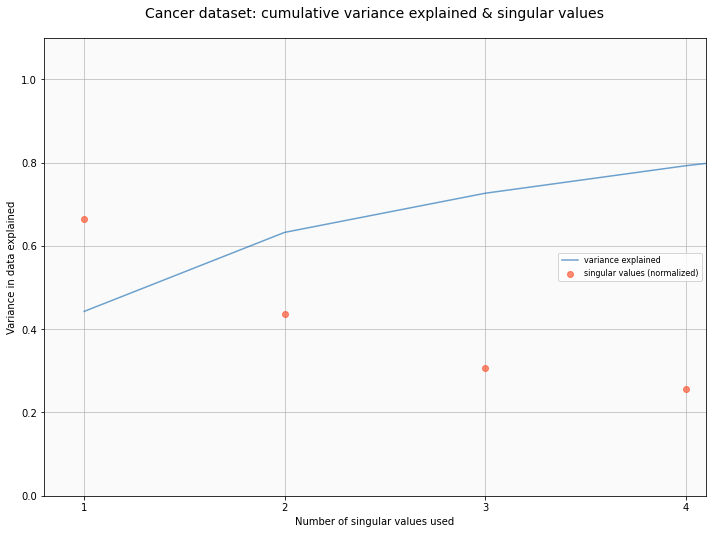

In [ ]:
import sklearn.preprocessing

fig = plt.figure(figsize=(10.0,7.5))
ax = fig.add_subplot(111)

plt.plot(num_sv,
         cum_var_explained,
         color='#2171b5',
         label='variance explained',
         alpha=0.65,
         zorder=1000)

plt.scatter(num_sv,
            sklearn.preprocessing.normalize(S.reshape((1,-1))),
            color='#fc4e2a',
            label='singular values (normalized)',
            alpha=0.65,
            zorder=1000)

plt.legend(loc='center right', scatterpoints=1, fontsize=8)

ax.set_xticks(num_sv)
ax.set_xlim(0.8, 4.1)
ax.set_ylim(0.0, 1.1)
ax.set_xlabel(r'Number of singular values used')
ax.set_ylabel('Variance in data explained')
ax.set_title('Cancer dataset: cumulative variance explained & singular values',
             fontsize=14,
             y=1.03)

ax.set_facecolor('0.98')

plt.grid(alpha=0.8, zorder=1)
plt.tight_layout()

In [ ]:
# the df.target gives the actual labels for the data points
# we're just selecting the locations corresponding to data points labeled 0,1 resp
# then we can plot those using different colors.

idx_benign = np.where(df.target=="Benign")[0]
idx_malignant = np.where(df.target=="Malignant")[0]


benign_x = -U[idx_benign, 0]
benign_y = -U[idx_benign, 1]

print(benign_x.shape)

malignant_x = -U[idx_malignant, 0]
malignant_y = -U[idx_malignant, 1]
print(benign_x.shape)

(357,)
(357,)


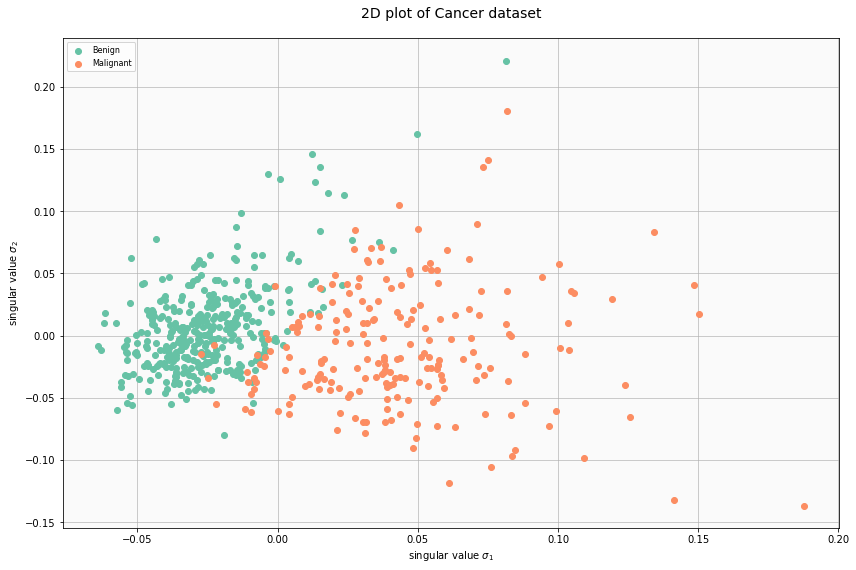

In [ ]:
fig = plt.figure(figsize=(12.0,8))
ax = fig.add_subplot(111)

plt.scatter(benign_x,
            benign_y,
            marker='o',
            color='#66c2a5',
            label='Benign',
            zorder=1000)

plt.scatter(malignant_x,
            malignant_y,
            marker='o',
            color='#fc8d62',
            label='Malignant',
            zorder=1000)

plt.legend(loc='upper left', scatterpoints=1, fontsize=8)

ax.set_xlabel(r'singular value $\sigma_{1}$')
ax.set_ylabel(r'singular value $\sigma_{2}$')
ax.set_title('2D plot of Cancer dataset',
             fontsize=14,
             y=1.03)
ax.set_facecolor('0.98')

plt.grid(alpha=0.8, zorder=1)
plt.tight_layout()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
features_scaled.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
X_scaled = features_scaled

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)


Text(0.5, 0, 'Second Principal Component')

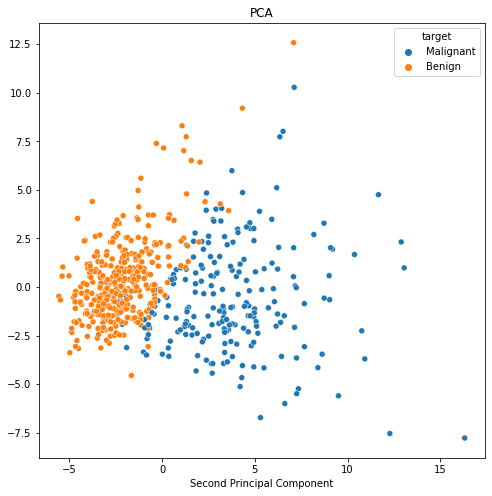

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=df['target'])
plt.title("PCA")
plt.xlabel("First Principal Component")
plt.xlabel("Second Principal Component")
